In [1]:
# Data processing
import pandas as pd
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
#Iteration engine and tensor flow database
import tensorflow_datasets as tfds
import tensorflow as tf

# Machine learning process
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier

# features analysis libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.decomposition import PCA

%matplotlib inline

2022-08-26 06:30:32.337723: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
data = pd.read_csv('amazon_reviews_us_Video_Games_v1_00-Copy1.tsv',sep='\t', error_bad_lines=False)

/tmp/ipykernel_1209/718005722.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('amazon_reviews_us_Video_Games_v1_00-Copy1.tsv',sep='\t', error_bad_lines=False)
b'Skipping line 20630: expected 15 fields, saw 22\nSkipping line 28172: expected 15 fields, saw 22\nSkipping line 54791: expected 15 fields, saw 22\n'
b'Skipping line 75419: expected 15 fields, saw 22\nSkipping line 104832: expected 15 fields, saw 22\n'
b'Skipping line 138464: expected 15 fields, saw 22\nSkipping line 194849: expected 15 fields, saw 22\n'
b'Skipping line 201568: expected 15 fields, saw 22\nSkipping line 242567: expected 15 fields, saw 22\n'
b'Skipping line 493585: expected 15 fields, saw 22\nSkipping line 502478: expected 15 fields, saw 22\n'
b'Skipping line 660750: expected 15 fields, saw 22\n'


In [3]:
data.tail(10)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
1780258,US,52714368,RT1RXAF0JRS9U,B00000JL6V,334018759,Riven: The Sequel to Myst,Video Games,1,2,4,N,N,Riven: The Sequel to Myst,"In this, one of the most eagerly awaited compu...",1997-12-14
1780259,US,53068113,R1U4NAKFZRFFLA,B00000JL6V,334018759,Riven: The Sequel to Myst,Video Games,5,0,0,N,N,Amazing!,The creators of this game must be geniuses to ...,1997-12-13
1780260,US,52827638,R2N4VCBGD3NSZE,B00000JL6V,334018759,Riven: The Sequel to Myst,Video Games,4,0,1,N,N,"Riven: Impressive, Beautiful, Unchallenging",<br />The graphics in Riven make good use of t...,1997-12-08
1780261,US,52930256,R2HRHSLRKZZVNJ,B00000JL6V,334018759,Riven: The Sequel to Myst,Video Games,5,1,1,N,N,Riven: This is the Standard for new Games !!,"I've already said it all. But More ? Yes, th...",1997-11-29
1780262,US,52958893,R3C8YZ5PVHS0FV,B00000JL6V,334018759,Riven: The Sequel to Myst,Video Games,5,1,1,N,N,Riven - Addiction may be a factor,I have on occassions dabbled with friends copi...,1997-11-18
1780263,US,52758880,RPC430LWZJ60T,B00000JL6V,334018759,Riven: The Sequel to Myst,Video Games,5,1,1,N,N,&quot;Riven&quot; generally lives up to its bi...,I don't think it is necessary for me to wax po...,1997-11-09
1780264,US,52477491,R347MZT5FH6HRJ,B00000JL6V,334018759,Riven: The Sequel to Myst,Video Games,5,2,2,N,N,An Immersive Experience - A Work of Art,If I could rate higher than a ten I would. Thi...,1997-11-09
1780265,US,53023047,RJ5BETZP0VIUS,B00000JL6V,334018759,Riven: The Sequel to Myst,Video Games,1,0,2,N,N,Riven - or Driven by Microsoft?,Fewer than 1 in 3 modern Windows computers are...,1997-11-08
1780266,US,53088309,R85QTDO2KZMGO,B00000JL6V,334018759,Riven: The Sequel to Myst,Video Games,1,1,3,N,N,Disappointment !!!,Unfortunately Riven is available only to those...,1997-11-06
1780267,US,52917144,R2W36RZZZNTYWF,B00000JL6V,334018759,Riven: The Sequel to Myst,Video Games,5,1,1,N,N,Engulfed in Wonder,"If you are brave enough to buy the game, do th...",1997-11-06


In [4]:
rating = ['low','neutral','high']

def rating_y(y):
    if y<=2:
        return rating[0]
    elif y>=4:
        return rating[2]
    else:
        return rating[1]


data['rating_cat'] = data['star_rating'].apply(rating_y)


data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,rating_cat
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31,high
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31,high
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31,low
3,US,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31,neutral
4,US,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31,high


In [5]:
data_shoes=data.drop(['marketplace', 'review_id',
                      'product_id','product_parent',
                      'product_category','helpful_votes',
                       'total_votes','vine',
                       'verified_purchase','review_headline',
                     'review_date','customer_id',
                      'product_title',], axis=1)

In [6]:
data_games1=data_shoes.head(50000)
data_games1.head(5)

,star_rating,review_body,rating_cat
0,5,"Used this for Elite Dangerous on my mac, an am...",high
1,5,"Loved it, I didn't even realise it was a gami...",high
2,1,poor quality work and not as it is advertised.,low
3,3,"nice, but tend to slip away from stick in inte...",neutral
4,4,"Great amiibo, great for collecting. Quality ma...",high


In [7]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation,TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

stemmer = SnowballStemmer("english")
tokenizer = RegexpTokenizer("[a-z']+")

def tokenize(text):
    tokens = tokenizer.tokenize(text)
    return [stemmer.stem(t) for t in tokens] 

def get_tf(data_games1, use_idf, max_df=1.0, min_df=1, ngram_range=(1,1)):
    if use_idf:
        m = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words='english', ngram_range=ngram_range, tokenizer=tokenize)
    else:
        m = CountVectorizer(max_df=max_df, min_df=min_df, stop_words='english', ngram_range=ngram_range, tokenizer=tokenize)
    
    d = m.fit_transform(data_games1.values.astype('U'))
    
    return m, d

tf_m, tf_d = get_tf(data_games1['review_body'], use_idf=False, max_df=0.90, min_df=10)
tfidf_m, tfidf_d = get_tf(data_games1['review_body'], use_idf=True, max_df=0.90, min_df=10)


/home/andri/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


In [8]:

n_topics = 10

def get_lda(data_games1, topics):
    m = LatentDirichletAllocation(n_components=topics, n_jobs=-1, learning_method='online').fit(data_games1)
    d = m.transform(data_games1)
    return m, d

def get_kmeans(data_games1, k, scale=True):
    if scale:
        s = MinMaxScaler()
        data = s.fit_transform(data_games1)
    
    m = KMeans(n_clusters=k).fit(data_games1)
    d = m.predict(data_games1)
    return m, d        

lda_m, lda_d = get_lda(tf_d, n_topics)
kmean_m, kmean_d = get_kmeans(tfidf_d, n_topics, scale=False)


In [9]:

def show_topics(model, feature_names, n_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-n_words - 1:-1]]))
    print()
    
def show_cluster_topics(cluster_labels, tf_matrix, feature_names, n_words):
    d = pd.DataFrame(tf_matrix.toarray())
    d['c'] = cluster_labels
    d = d.groupby('c').sum().T
    
    for col in d:
        top_n = d[col].nlargest(n_words).index.tolist()
        print("Cluster #%d:" % col)
        print(", ".join([feature_names[i]
                for i in top_n]))
    print()
    
print("Top 15 stemmed words per topic in LDA model\n")
show_topics(lda_m, tf_m.get_feature_names(), 15)


Top 15 stemmed words per topic in LDA model

Topic #0:
game, good, play, veri, fun, old, year, time, realli, got, hour, enjoy, friend, like, gift
Topic #1:
love, came, game, bought, kid, work, just, happi, expect, like, veri, time, exact, order, day
Topic #2:
br, game, just, like, time, play, becaus, excel, thing, make, want, onli, i'm, everi, peopl
Topic #3:
great, work, game, perfect, fast, price, ship, wish, ok, vita, deliveri, deal, monster, bundl, screen
Topic #4:
ps, xbox, work, recommend, item, problem, arriv, box, consol, buy, pc, new, time, condit, instal
Topic #5:
game, play, charact, stori, like, fun, son, best, graphic, realli, seri, gameplay, level, fan, enjoy
Topic #6:
control, work, use, like, button, fit, ds, just, look, feel, batteri, stick, wii, didn't, onli
Topic #7:
product, charg, thank, nice, best, u, nintendo, super, wireless, control, devic, servic, quick, tv, glad
Topic #8:
veri, headset, sound, purchas, qualiti, good, month, use, issu, headphon, mic, price, ab

/home/andri/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:

print("Top 15 stemmed words per cluster in Kmeans model\n")
show_cluster_topics(kmean_d, tfidf_d, tfidf_m.get_feature_names(), 15)


Top 15 stemmed words per cluster in Kmeans model

Cluster #0:
awesom, game, love, thank, great, product, work, addict, fast, veri, graphic, ship, look, price, play
Cluster #1:
great, game, work, product, price, deal, item, buy, thank, condit, gift, fun, seller, control, look
Cluster #2:
game, fun, play, great, best, love, like, veri, good, time, realli, just, enjoy, lot, stori
Cluster #3:
great, perfect, control, veri, product, like, use, thank, nice, good, just, love, work, time, expect
Cluster #4:
good, veri, game, product, price, work, condit, qualiti, realli, thank, stuff, deal, pretti, buy, item
Cluster #5:
excel, product, game, condit, veri, happi, recommend, purchas, thank, seller, work, item, qualiti, great, price
Cluster #6:
love, kid, game, grandson, daughter, great, husband, thank, boy, gift, play, old, year, grandkid, time
Cluster #7:
br, game, play, control, like, use, just, veri, time, onli, work, realli, ps, good, great
Cluster #8:
son, love, game, great, enjoy, play, bo

In [11]:

def get_svd(data_games1, components):
    svd = TruncatedSVD(n_components=components).fit(data_games1)
    o = pd.DataFrame(svd.transform(data_games1), columns=range(0,components))
    return svd,o

def get_tsne(data_games1, components, perplexity):
    tsne = TSNE(n_components=components, perplexity=perplexity, n_iter=1000)
    o = pd.DataFrame(tsne.fit_transform(data_games1), columns=range(0,components))
    return tsne,o

svd_v, svd_m = get_svd(tfidf_d, 50)
tnse_v, tsne_m = get_tsne(svd_m, 2, 25)

lda_c = lda_d.argmax(axis=1)


/home/andri/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/andri/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [12]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

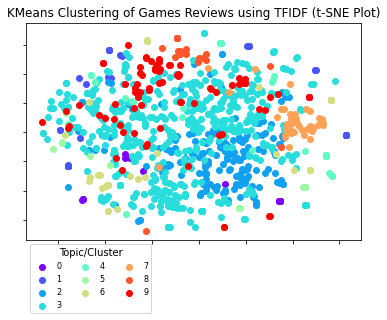

In [13]:

def plot_scatter_2d(x, y, c, sample_size, title):
    df = pd.DataFrame({'x': x, 'y': y, 'c': c}).sample(sample_size)
    l = len(np.unique(c))
    
    ax = plt.subplot(111)
    colors = cm.rainbow(np.linspace(0, 1, l))
                                   
    for c in range(0,l):
        qq = df[df['c']==c]
        ax.scatter(qq['x'], qq['y'],c=colors[c], label=c)
    plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0), title='Topic/Cluster')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title(title)
    plt.show()

get_ipython().run_line_magic('matplotlib', 'inline')
plot_scatter_2d(tsne_m[0], tsne_m[1], kmean_d, 1000, 'KMeans Clustering of Games Reviews using TFIDF (t-SNE Plot)')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

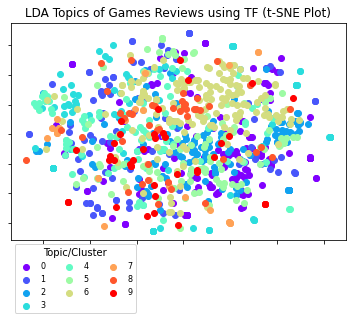

In [14]:
get_ipython().run_line_magic('matplotlib', 'inline')
plot_scatter_2d(tsne_m[0], tsne_m[1], lda_c, 1000, 'LDA Topics of Games Reviews using TF (t-SNE Plot)')


In [15]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_d, 
                                                    data_games1['rating_cat'], 
                                                    test_size=0.3)


In [16]:

def calculate_cv(X, y):
    results = {
        'lr': [],
        'svm': [],
        'nb': [],
        'combined': []
    }
    lm = LogisticRegression()
    svm = LinearSVC()
    nb = MultinomialNB()
    vc = VotingClassifier([('lm', lm), ('svm', svm), ('nb', nb)])
    
    for c in rating:
        y_adj = np.array(y==c)
        results['lr'].append((cross_val_score(lm, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['svm'].append((cross_val_score(svm, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['nb'].append((cross_val_score(nb, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['combined'].append((cross_val_score(vc, X, y_adj, cv=10, scoring='accuracy').mean(), c))
    return results

cv_scores = calculate_cv(X_test, y_test)

print("Model accuracy predictions\n")
for m,s in cv_scores.items():
    for ss in s:
        print("{M} model ({R} rating): {S:.1%}".format(M=m.upper(), R=ss[1], S=ss[0]))
    print()


Model accuracy predictions

LR model (low rating): 90.5%
LR model (neutral rating): 93.1%
LR model (high rating): 87.7%

SVM model (low rating): 90.3%
SVM model (neutral rating): 92.6%
SVM model (high rating): 87.8%

NB model (low rating): 87.3%
NB model (neutral rating): 93.0%
NB model (high rating): 84.4%

COMBINED model (low rating): 90.4%
COMBINED model (neutral rating): 93.1%
COMBINED model (high rating): 87.7%



In [17]:

def get_lr(x, y):
    models = []
    for c in rating:
        y_adj = np.array(y==c)
        lm = LogisticRegression()
        lm_f = lm.fit(x, y_adj)
        models.append(lm_f)
    return models

lr_m = get_lr(X_train, y_train)


/home/andri/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/andri/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/andri/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


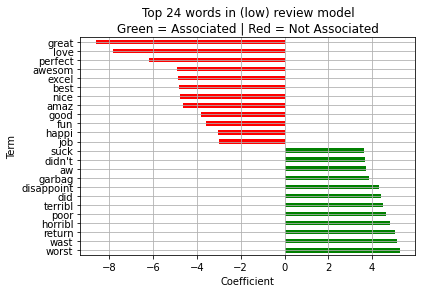

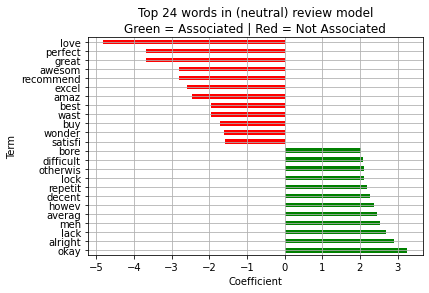

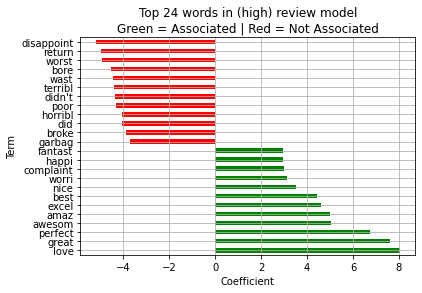

In [18]:

get_ipython().run_line_magic('matplotlib', 'inline')

def plot_coef(title, model, feature_names, n_words):
    v = []
    for topic_idx, topic in enumerate(model.coef_):
        [v.append([feature_names[i], model.coef_.item(i)]) for i in topic.argsort()[:-n_words - 1:-1]]
        [v.append([feature_names[i], model.coef_.item(i)]) for i in topic.argsort()[0:n_words]]
    df = pd.DataFrame(v, columns=['Term','Coefficient']).sort_values(by='Coefficient',ascending=False)
    df['c'] = df['Coefficient']>0
    ax = df.plot(x='Term', y='Coefficient', kind='barh', color=df['c'].map({True: 'g', False: 'r'}), grid=True, legend=False,
           title=title)
    ax.set_xlabel("Coefficient")

n_terms = 12
for c in range(0,len(rating)):
    plot_coef('Top {N} words in ({R}) review model\nGreen = Associated | Red = Not Associated'.format(N=n_terms*2, R=rating[c]), 
              lr_m[c], tfidf_m.get_feature_names(), n_terms)


In [19]:

def test_review(text):
    test_str = [text]
    test_new = tfidf_m.transform(test_str)

    print('Review text: "{R}"\n'.format(R=test_str[0]))
    print('Model Prediction')
    for m in range(0,3):
        print('Model ({M}): {P:.1%}'.format(M=rating[m], P=lr_m[m].predict_proba(test_new)[0][1]))



In [20]:
test_review('worst game I ever played')

Review text: "worst game I ever played"

Model Prediction
Model (low): 94.7%
Model (neutral): 4.5%
Model (high): 4.1%


In [21]:

test_review('Im really dissapointed with the game story')

Review text: "Im really dissapointed with the game story"

Model Prediction
Model (low): 17.5%
Model (neutral): 15.8%
Model (high): 58.8%
